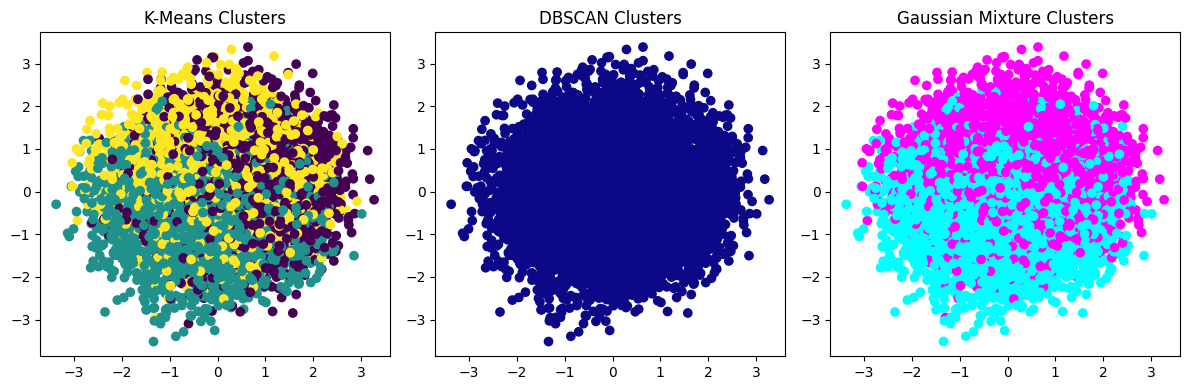

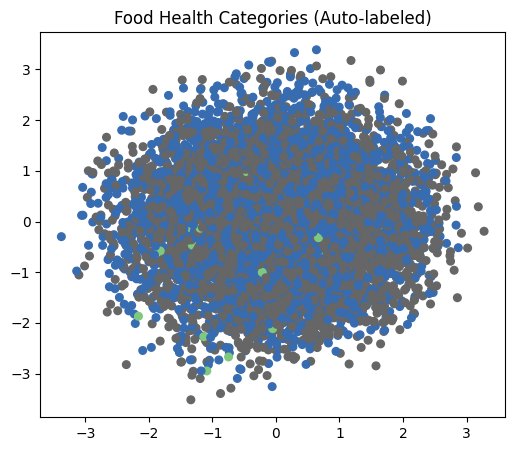


=== Average Nutrition per Health Category ===
                 Calories  Protein    Fat  Sugars  Fiber
Health_Category                                         
Healthy             97.55    25.80   2.67    4.81   5.27
Moderate           177.30    25.32  25.61   25.12   5.01
Unhealthy          451.04    25.68  25.43   25.11   4.97


In [1]:
# food_health_unsupervised_final.py

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Load or Simulate Dataset
# -------------------------------
# Replace this with your actual CSV, e.g.
# df = pd.read_csv("food_data.csv")
df = pd.read_csv("processed_nutrition_data_with_disease.csv")
df = df.drop(columns=['healthy','Food_Item','Category'])  
# -------------------------------
# 2️⃣ Preprocess Data
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# -------------------------------
# 3️⃣ Clustering Models
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.8, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=3, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(X_scaled)

# -------------------------------
# 4️⃣ Auto-label clusters (based on nutrition)
# -------------------------------
def health_label(row):
    if row["Calories"] < 150 and row["Fat"] < 5 and row["Sugars"] < 10:
        return "Healthy"
    elif row["Calories"] < 300:
        return "Moderate"
    else:
        return "Unhealthy"

df["Health_Category"] = df.apply(health_label, axis=1)

# -------------------------------
# 5️⃣ PCA for Visualization
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["KMeans_Cluster"], cmap="viridis")
plt.title("K-Means Clusters")

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["DBSCAN_Cluster"], cmap="plasma")
plt.title("DBSCAN Clusters")

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["GMM_Cluster"], cmap="cool")
plt.title("Gaussian Mixture Clusters")

plt.tight_layout()
plt.show()

# -------------------------------
# 6️⃣ Health Category Visualization
# -------------------------------
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=pd.Categorical(df["Health_Category"]).codes,
            cmap="Accent", s=30)
plt.title("Food Health Categories (Auto-labeled)")
plt.show()

# -------------------------------
# 7️⃣ Cluster Summary
# -------------------------------
summary = df.groupby("Health_Category")[["Calories", "Protein", "Fat", "Sugars", "Fiber"]].mean().round(2)
print("\n=== Average Nutrition per Health Category ===")
print(summary)

# Optional: export results
# df.to_csv("food_health_clusters.csv", index=False)
